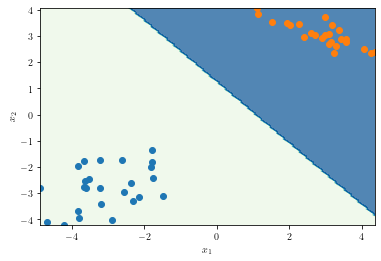

In [11]:
%run HW3_SVM_skeleton.py

In [ ]:
# Filename: HW3_SVM_skeleton.py
# Author: Harald Leisenberger
# Edited: May, 2023

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

def linear_kernel(x, y):
    """ Evaluates value of the linear kernel for inputs x,y
    
    Input: x ... a vector in the feature space
           y ... a vector in the feature space
    
    Output: value ... value of the linear kernel applied to x,y
    """

    if x.ndim == 1:
        return np.sum(x * y)
    else:
        return np.sum(x * y, 1)


# --------------------------------------------------------------------------------

def poly_kernel(x, y, d):
    """ Evaluates value of the d-degree polynomial kernel for inputs x,y
    
    Input: x ... a vector in the feature space
           y ... a vector in the feature space
           d ... degree of the polynomial kernel
    
    Output: value ... value of the d-degree polynomial kernel applied to x,y
    """

    if x.ndim == 1:
        return (np.sum(x * y) + 1)**d
    else:
        return (np.sum(x * y, 1) + 1)**d


# --------------------------------------------------------------------------------

def y_dual(x, X_train, t_train, alpha, b, kernel):
    """ Evaluates the dual form of y(x) (see equation (3) on assignment) based on the training
        data, alpha and b for a new point x. Useful for other functions below.
    
    Input: x ... a vector in the feature space
           X_train ... the training features
           t_train ... the training targets
           alpha ... a parameter vector of the dual problem
           b ... an offset parameter
           kernel ... which kernel to be used for evaluation: must be either 'linear' or 'poly'
           
    
    Output: value ... value of the fual decision function y(x)
    """

    # TODO: evaluate y(x) in a (2D-)point x based on the given data and parameters

    if kernel == 'linear':
        value = np.sum(alpha * t_train * linear_kernel(np.tile(x, (X_train.shape[0], 1)), X_train)) + b
    if kernel == 'poly':
        degree = 3
        value = np.sum(alpha * t_train * poly_kernel(np.tile(x, (X_train.shape[0], 1)), X_train, degree)) + b

    return value


# --------------------------------------------------------------------------------

def dual_predict(X_new, X_train, t_train, alpha, b, kernel):
    """ Predicts the target values for a given data sample X_new and for given parameters alpha,
        b and a chosen kernel, based on training features and training targets. Useful for plotting
        a decision boundaries on a grid (in combination with colormap).
    
    Input: X_new ... new 2D-data to be classified
           X_train ... the training features
           t_train ... the training targets
           alpha ... a parameter vector of the dual problem
           b ... an offset parameter
           kernel ... which kernel to be used for evaluation: must be either 'linear' or 'poly'       
    
    Output: y_estimate ... an array consisting of all target predictions for the new 2D-samples
                           to be classified in X_new
    """

    # TODO: implement prediction of new targets based on the decision function y(x) (see description
    #       after equation (3) on assignment)

    y_estimate = []

    if kernel == 'linear':
        for x in X_new:
            y_estimate.append(np.sign(y_dual(x, X_train, t_train, alpha, b, 'linear')))
    if kernel == 'poly':
        #degree = 3
        for x in X_new:
            y_estimate.append(np.sign(y_dual(x, X_train, t_train, alpha, b, 'poly')))

    return y_estimate


# --------------------------------------------------------------------------------

def objective_dual(X_train, t_train, alpha, kernel):
    """ Computes the value of the dual objective function \tilde{L}(\alpha) given in equation (1) on the
        assignment. Is used in the implementation of SMO to compute and store the objective function value
        after each iteration of SMO.
    
    Input: X_train ... the training features
           t_train ... the training targets
           alpha ... a parameter vector of the dual problem
           kernel ... which kernel to be used for evaluation: must either be 'linear' or 'poly'
           
    
    Output: value ... value of the dual objective function
    """

    # TODO: implement computation of the objective function for given training features and targets, a
    #       parameter vector alpha and a kernel

    if kernel == 'linear':
        pass
        # TODO

    if kernel == 'polynomial':
        degree = 3
        pass
        # TODO 

    return value


# --------------------------------------------------------------------------------

def SMO(X_train, t_train, alpha0, b0, kernel, C, max_iter):
    """ Implementation of the SMO algorithm. Optimizes the parameter vector alpha that solves approximately
        the dual SVM program (see (1),(2) on the assignment). For a detailed description, see there.
    
    Input: X_train ... the training features
           t_train ... the training targets
           alpha0 ... initial values of parameter vector alpha
           b0 ... initial value of the offset parameter b
           kernel ... kernel to be used for evaluation: must either be 'linear' or 'poly'
           C ... a regularization parameter
           max_iter ... number of SMO iterations to be performed (1 iteration = 1 run over all alpha_n for 1, ... ,N)
           
    
    Output: alpha ... best found parameter vector for alpha; used for estimating the decision boundary
            b ... final value for offset parameter b; also used for estimating the decision boundary
            dual_values ... array with the objective function value after each SMO iteration
    """

    # TODO: implement computation of the objective function for given training features and targets, a
    #       parameter vector alpha and a kernel

    iterations = 0
    alpha = alpha0
    b = b0
    dual_values = []

    dual_values = np.zeros((max_iter, 1))

    if kernel == 'linear':

        while iterations < max_iter:

            for n, a in enumerate(alpha):

                y = y_dual(X_train[n, :], X_train, t_train, alpha, b, kernel)
                beta = t_train[n] * y

                if not ((a == 0 and beta >= 1) or (a == C and beta <= 1) or (0 < a < C and beta == 1)):

                    ai = a
                    i = n
                    j = np.random.choice(np.delete(np.arange(0, len(alpha)), i))
                    aj = alpha[j]

                    if t_train[i] != t_train[j]:

                        L = np.max((0, aj - ai))
                        H = np.min((C, C + aj - ai))

                    else:

                        L = np.max((0, ai + aj - C))
                        H = np.min((C, ai + aj))

                    ai_old = ai
                    aj_old = aj

                    Ei = y_dual(X_train[i, :], X_train, t_train, alpha, b, kernel) - t_train[i]
                    Ej = y_dual(X_train[j, :], X_train, t_train, alpha, b, kernel) - t_train[j]

                    eta = 2 * linear_kernel(X_train[i, :], X_train[j, :]) - \
                          linear_kernel(X_train[i, :], X_train[i, :]) - linear_kernel(X_train[j, :], X_train[j, :])

                    aj_prime = aj_old - t_train[j] * (Ei - Ej) / eta

                    aj = np.clip(aj_prime, L, H)

                    ai = ai_old + t_train[i] * t_train[j] * (aj_old - aj)

                    alpha[i] = ai
                    alpha[j] = aj

                    b1 = b - Ei - t_train[i] * (ai - ai_old) * linear_kernel(X_train[i, :], X_train[i, :]) - \
                         t_train[j] * (aj - aj_old) * linear_kernel(X_train[i, :], X_train[j, :])

                    b2 = b - Ej - t_train[i] * (ai - ai_old) * linear_kernel(X_train[i, :], X_train[j, :]) - \
                         t_train[j] * (aj - aj_old) * linear_kernel(X_train[j, :], X_train[j, :])

                    if 0 < ai < C:
                        b = b1
                    elif 0 < aj < C:
                        b = b2
                    else:
                        b = (b1 + b2) / 2

            dual_values[iterations] = y
            
            constraint_val = 0
            for n in range(0,len(X_train)):
                for m in range(0,len(X_train)):
                    constraint_val += alpha[n]*alpha[m]*t_train[n]*t_train[m]*linear_kernel(X_train[n, :], X_train[m, :])
            dual_values[iterations] = sum(alpha) -0.5* constraint_val
            
            iterations += 1

    if kernel == 'poly':

        while iterations < max_iter:

            for n, a in enumerate(alpha):

                y = y_dual(X_train[n, :], X_train, t_train, alpha, b, kernel)
                beta = t_train[n] * y

                if not ((a == 0 and beta >= 1) or (a == C and beta <= 1) or (0 < a < C and beta == 1)):

                    ai = a
                    i = n
                    j = np.random.choice(np.delete(np.arange(0, len(alpha)), i))
                    aj = alpha[j]

                    if t_train[i] != t_train[j]:

                        L = np.max((0, aj - ai))
                        H = np.min((C, C + aj - ai))

                    else:

                        L = np.max((0, ai + aj - C))
                        H = np.min((C, ai + aj))

                    ai_old = ai
                    aj_old = aj

                    Ei = y_dual(X_train[i, :], X_train, t_train, alpha, b, kernel) - t_train[i]
                    Ej = y_dual(X_train[j, :], X_train, t_train, alpha, b, kernel) - t_train[j]

                    eta = 2 * poly_kernel(X_train[i, :], X_train[j, :], 3) - \
                          poly_kernel(X_train[i, :], X_train[i, :], 3) - poly_kernel(X_train[j, :], X_train[j, :], 3)

                    aj_prime = aj_old - t_train[j] * (Ei - Ej) / eta

                    aj = np.clip(aj_prime, L, H)

                    ai = ai_old + t_train[i] * t_train[j] * (aj_old - aj)

                    alpha[i] = ai
                    alpha[j] = aj

                    b1 = b - Ei - t_train[i] * (ai - ai_old) * poly_kernel(X_train[i, :], X_train[i, :], 3) - \
                         t_train[j] * (aj - aj_old) * poly_kernel(X_train[i, :], X_train[j, :], 3)

                    b2 = b - Ej - t_train[i] * (ai - ai_old) * poly_kernel(X_train[i, :], X_train[j, :], 3) - \
                         t_train[j] * (aj - aj_old) * poly_kernel(X_train[j, :], X_train[j, :], 3)

                    if 0 < ai < C:
                        b = b1
                    elif 0 < aj < C:
                        b = b2
                    else:
                        b = (b1 + b2) / 2

            dual_values[iterations] = y
            iterations += 1

    return alpha, b, dual_values

# --------------------------------------------------------------------------------
# Assignment 3 - Section 3
# --------------------------------------------------------------------------------

#def main():
# !!! All undefined functions should be implemented in the section 'Helper Functions' !!!

# 3.1 Linear SVMs
# ----------------------------------------------
"""
# Load the linearly separable data array (50 x 3)
# Column 1: feature 1; Column 2: feature 2; Column 3: class label (-1 or 1)
data_svm_lin = np.loadtxt('HW3_SVM_linear.data')
X_lin = data_svm_lin[:, 0:2]
t_lin = data_svm_lin[:, 2]
#
# # TODO: Implement the SMO algorithm with a linear kernel and fit a linear SVM to the data
C = 1
max_iter_lin = 100
alpha0 = np.zeros(50)
b0 = 0
max_iter_lin = 10
#
alpha_opt_lin_1, b_opt_lin_1, dual_values_lin_1 = SMO(X_lin, t_lin, alpha0, b0, 'linear', C, max_iter_lin)

    # # TODO: Plot the decision boundary, support vectors, margin and the objective function values over the iterations
#
x_min = np.min(X_lin[:, 0])
x_max = np.max(X_lin[:, 0])
y_min = np.min(X_lin[:, 1])
y_max = np.max(X_lin[:, 1])
#
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                      np.linspace(y_min, y_max, 500))
#
y_grid = np.zeros(xx.shape)
#
for row in range(0, xx.shape[0]):
    for col in range(0, xx.shape[1]):
        point = np.array([xx[0, row], yy[col, 0]])
        y_grid[row, col] = y_dual(point, X_lin, t_lin, alpha_opt_lin_1, b_opt_lin_1, 'linear')

        
#get slope of decision boundary       
flattened = abs(y_grid).flatten()
smallest_indices = np.argsort(flattened)[:8]
row_indices, col_indices = np.unravel_index(smallest_indices, y_grid.shape)
point1=[xx[0,row_indices[0]],yy[col_indices[0],0]]
point2=[xx[0,row_indices[1]],yy[col_indices[1],0]]
k = np.subtract(point2,point1)
k=k[1]/k[0]
#get support vectors
sv=X_lin[np.where(alpha_opt_lin_1)]



ax=plt.figure(1)
y_grid[y_grid < 0] = -1
y_grid[y_grid > 0] = 1

plt.contourf(xx.transpose(), yy.transpose(), y_grid, cmap=plt.cm.GnBu, alpha=0.7)

plt.scatter(X_lin[t_lin == -1, 0], X_lin[t_lin == -1, 1])
plt.scatter(X_lin[t_lin == 1, 0], X_lin[t_lin == 1, 1])

plt.plot([x_min,(-sv[0,1]+y_min)/k+sv[0,0]], [(-sv[0,0]+x_min)*k+sv[0,1],y_min],linestyle='--')
plt.plot([x_max,(-sv[1,1]+y_max)/k+sv[1,0]], [(-sv[1,0]+x_max)*k+sv[1,1],y_max],linestyle='--')


plt.scatter(sv[:,0],sv[:,1],marker='x',c='k')


plt.axes().set_aspect('equal', adjustable='box')
#plt.plot([0,project_line[0]], [0,project_line[1]])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Linear SVM")
plt.savefig("lin_svm.pdf")
plt.show()


fig = plt.figure(2)
plt.plot(dual_values_lin_1)
plt.xlabel('Iterations')
plt.ylabel(r"Objective Function $\tilde{L}(\alpha)$")
plt.title(r"Change of Objective Function $\tilde{L}(\alpha)$ over Iterations")
plt.savefig("lalpha.pdf")
plt.show()

#
# # TODO: Add the sample (-1,3) with target -1 to the data and fit another SVM
C=0.23
max_iter_lin = 300
alpha0 = np.zeros(51)
X_modified=np.zeros([51,2])
X_modified[0:49,:] = X_lin[0:49,:]
X_modified[50,:] = [-1,3]
t_modified=np.zeros(51)
t_modified[0:49] = t_lin[0:49]
t_modified[50] = -1
alpha_opt_lin_2, b_opt_lin_2, dual_values_lin_2 = SMO(X_modified,t_modified,alpha0,b0,'linear',C,max_iter_lin)
#
x_min = np.min(X_lin[:, 0])
x_max = np.max(X_lin[:, 0])
y_min = np.min(X_lin[:, 1])
y_max = np.max(X_lin[:, 1])
#
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                      np.linspace(y_min, y_max, 500))
#
y_grid = np.zeros(xx.shape)
#
for row in range(0, xx.shape[0]):
    for col in range(0, xx.shape[1]):
        point = np.array([xx[0, row], yy[col, 0]])
        y_grid[row, col] = y_dual(point,X_modified,t_modified, alpha_opt_lin_2, b_opt_lin_2, 'linear')

        
#get slope of decision boundary       
flattened = abs(y_grid).flatten()
smallest_indices = np.argsort(flattened)[:8]
row_indices, col_indices = np.unravel_index(smallest_indices, y_grid.shape)
point1=[xx[0,row_indices[0]],yy[col_indices[0],0]]
point2=[xx[0,row_indices[1]],yy[col_indices[1],0]]
k = np.subtract(point2,point1)
k=k[1]/k[0]
#get support vectors
sv=X_modified[np.where(alpha_opt_lin_2)]



ax=plt.figure(1)
y_grid[y_grid < 0] = -1
y_grid[y_grid > 0] = 1

plt.contourf(xx.transpose(), yy.transpose(), y_grid, cmap=plt.cm.GnBu, alpha=0.7)

plt.scatter(X_modified[t_modified == -1, 0], X_modified[t_modified == -1, 1])
plt.scatter(X_modified[t_modified == 1, 0], X_modified[t_modified == 1, 1])

#plt.plot([x_min,(-sv[0,1]+y_min)/k+sv[0,0]], [(-sv[0,0]+x_min)*k+sv[0,1],y_min],linestyle='--')
#plt.plot([x_max,(-sv[1,1]+y_max)/k+sv[1,0]], [(-sv[1,0]+x_max)*k+sv[1,1],y_max],linestyle='--')


#plt.scatter(sv[:,0],sv[:,1],marker='x',c='k')


plt.axes().set_aspect('equal', adjustable='box')
#plt.plot([0,project_line[0]], [0,project_line[1]])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Linear SVM with added point")
plt.savefig("added_point.pdf")
plt.show()

"""



# 2.2 Nonlinear SVMs
# ----------------------------------------------

# Load the nonlinearly separable data array (50 x 3)
# Column 1: feature 1; Column 2: feature 2; Column 3: class label (-1 or 1)
data_svm_nonlin = np.loadtxt('HW3_SVM_nonlinear.data')
X_nonlin = data_svm_nonlin[:,0:2]
t_nonlin = data_svm_nonlin[:,2]

# TODO: Implement the SMO algorithm with a 3-degree polynomial kernel and fit a nonlinera SVM to the data
C = 1
max_iter_nonlin = 13000
alpha0 = np.zeros(50)
b0 = 0

alpha_opt_nonlin, b_opt_nonlin, dual_values_nonlin = SMO(X_nonlin, t_nonlin, alpha0, b0, 'poly', C, max_iter_nonlin)

x_min = np.min(X_nonlin[:, 0])
x_max = np.max(X_nonlin[:, 0])
y_min = np.min(X_nonlin[:, 1])
y_max = np.max(X_nonlin[:, 1])

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

y_grid = np.zeros(xx.shape)

for row in range(0, xx.shape[0]):
    for col in range(0, xx.shape[1]):
        point = np.array([xx[0, row], yy[col, 0]])
        y_grid[row, col] = y_dual(point, X_nonlin, t_nonlin, alpha_opt_nonlin, b_opt_nonlin, 'poly')

y_grid = np.sign(y_grid)
plt.contourf(xx.transpose(), yy.transpose(), y_grid, cmap=plt.cm.GnBu, alpha=0.7)
plt.scatter(X_nonlin[t_nonlin == -1, 0], X_nonlin[t_nonlin == -1, 1])
plt.scatter(X_nonlin[t_nonlin == 1, 0], X_nonlin[t_nonlin == 1, 1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axes().set_aspect('equal', adjustable='box')
plt.title("Non Linear SVM")
plt.savefig("added_point.pdf")
plt.show()



# --------------------------------------------------------------------------------
# Helper Functions (to be implemented!)
# --------------------------------------------------------------------------------



In [15]:
point1=[1,1]
point2 = [0,1]
y_dual(point2, X_lin, t_lin, alpha_opt_lin_1, b_opt_lin_1, 'linear')

%matplotlib qt

In [105]:
for row in range(0, xx.shape[0]):
    for col in range(0, xx.shape[1]):
        point = np.array([xx[0, row], yy[col, 0]])
        y_grid[row, col] = y_dual(point, X_lin, t_lin, alpha_opt_lin_1, b_opt_lin_1, 'linear')

y_grid=abs(y_grid)
flattened = y_grid.flatten()

# Find the indices of the two smallest values in the flattened array
smallest_indices = np.argsort(flattened)[:2]

# Convert the indices to row and column indices
row_indices, col_indices = np.unravel_index(smallest_indices, y_grid.shape)
row_indices
#col_indices
#y_grid[71,48]

array([ 28, 101], dtype=int64)

In [47]:
import numpy as np

matrix = np.array([[1, 2, -3], [4, 5, 6], [0, 1, 2]])

# Flatten the matrix into a 1D array
flattened = matrix.flatten()

# Find the indices of the two smallest values in the flattened array
smallest_indices = np.argsort(flattened)[:2]

# Convert the indices to row and column indices
row_indices, col_indices = np.unravel_index(smallest_indices, matrix.shape)

print("Row indices of the smallest values:", row_indices)
print("Column indices of the smallest values:", col_indices)


Row indices of the smallest values: [0 2]
Column indices of the smallest values: [2 0]


In [56]:
point1=[xx[0,row_indices[0]],yy[col_indices[0],0]]
point2=[xx[0,row_indices[1]],yy[col_indices[1],0]]
k = np.subtract(point2,point1)
y_dual(point2, X_lin, t_lin, alpha_opt_lin_1, b_opt_lin_1, 'linear')
#k

0.0002792436592902181

In [132]:
proj_data = np.dot(X_lin,project_line)+b_opt_lin_1
sv1 = np.argmin([i for i in proj_data if i > 0])
sv2 = np.argmin([i for i in proj_data if i < 0])
X_lin[sv2+1]
#proj_data
#X_lin

array([3.23400749, 2.36791513])

In [28]:
len(X_lin)
sv=X_lin[np.where(alpha_opt_lin_1)]
print(sv[0,0])
print(sv[0,1])


-1.7755743602926912
-1.3523404286798417


In [106]:


print(np.array(np.where(abs(y_grid) == abs(y_grid).min())).flatten())

[ 28 495]


In [ ]:

#3D PLOT

ax = plt.figure().add_subplot(projection='3d')

surf = ax.plot_surface(xx.transpose(), yy.transpose(), abs(y_grid), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
point1=[xx[0,row_indices[0]],yy[col_indices[0],0]]
point2=[xx[0,row_indices[1]],yy[col_indices[1],0]]
point3=[xx[0,row_indices[2]],yy[col_indices[2],0]]
point4=[xx[0,row_indices[3]],yy[col_indices[3],0]]
point5=[xx[0,row_indices[4]],yy[col_indices[4],0]]
point6=[xx[0,row_indices[5]],yy[col_indices[5],0]]
point7=[xx[0,row_indices[6]],yy[col_indices[6],0]]
point8=[xx[0,row_indices[7]],yy[col_indices[7],0]]
ax.scatter(xx[0,row_indices[0]],yy[col_indices[0],0],y_dual(point1, X_lin, t_lin, alpha_opt_lin_1, b_opt_lin_1, 'linear'))
ax.scatter(xx[0,row_indices[1]],yy[col_indices[1],0],y_dual(point2, X_lin, t_lin, alpha_opt_lin_1, b_opt_lin_1, 'linear'))
ax.scatter(xx[0,row_indices[2]],yy[col_indices[2],0],y_dual(point3, X_lin, t_lin, alpha_opt_lin_1, b_opt_lin_1, 'linear'))
ax.scatter(xx[0,row_indices[3]],yy[col_indices[3],0],y_dual(point4, X_lin, t_lin, alpha_opt_lin_1, b_opt_lin_1, 'linear'))
ax.scatter(xx[0,row_indices[4]],yy[col_indices[4],0],y_dual(point5, X_lin, t_lin, alpha_opt_lin_1, b_opt_lin_1, 'linear'))
ax.scatter(xx[0,row_indices[5]],yy[col_indices[5],0],y_dual(point6, X_lin, t_lin, alpha_opt_lin_1, b_opt_lin_1, 'linear'))
ax.scatter(xx[0,row_indices[6]],yy[col_indices[6],0],y_dual(point7, X_lin, t_lin, alpha_opt_lin_1, b_opt_lin_1, 'linear'))
ax.scatter(xx[0,row_indices[7]],yy[col_indices[7],0],y_dual(point8, X_lin, t_lin, alpha_opt_lin_1, b_opt_lin_1, 'linear'))


In [30]:
alpha0.shape

(51,)